In [84]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
import pandas as pd
df = pd.read_csv('alturas-pesos-train.csv')

# Cual es la estimación de la probabilidad de que pese 65 y mida 165?

In [86]:
# contamos todas las personas que pesan 65kg y miden 165cm
frec_65_165 = ((df['Peso'] == 65) & (df['Altura'] == 165)).sum()
print(frec_65_165)

402


In [87]:
P_peso_65_alt_165 = frec_65_165/len(df)
print(P_peso_65_alt_165)

0.05025


Formalmente, si $X_1$ es el peso y $X_2$ es la altura

$P(X_1 = 65, X_2 = 165) = 0.05025 $

# Estimación de la conjunta

In [89]:
df[['Peso', 'Altura']].values

array([[ 60, 160],
       [ 95, 180],
       [ 75, 170],
       ...,
       [ 75, 170],
       [ 65, 165],
       [ 80, 170]])

In [90]:
tuplas = []
for line in df[['Peso', 'Altura']].values:
    tuplas.append(tuple(line))

In [93]:
from collections import Counter
Counter(tuplas).most_common(20)

[((60, 160), 453),
 ((85, 175), 408),
 ((65, 165), 402),
 ((75, 170), 394),
 ((80, 170), 369),
 ((80, 175), 351),
 ((70, 165), 337),
 ((90, 180), 335),
 ((65, 160), 305),
 ((55, 155), 302),
 ((70, 170), 279),
 ((55, 160), 272),
 ((90, 175), 262),
 ((85, 180), 239),
 ((60, 165), 235),
 ((75, 165), 209),
 ((50, 155), 208),
 ((95, 180), 201),
 ((60, 155), 179),
 ((85, 170), 176)]

In [94]:
frecuencia_conjunta = dict(Counter(tuplas))
frecuencia_conjunta

{(60, 160): 453,
 (95, 180): 201,
 (75, 170): 394,
 (55, 160): 272,
 (55, 150): 59,
 (80, 175): 351,
 (70, 170): 279,
 (55, 155): 302,
 (85, 180): 239,
 (60, 165): 235,
 (80, 165): 98,
 (95, 185): 153,
 (75, 165): 209,
 (65, 170): 128,
 (65, 160): 305,
 (40, 150): 16,
 (40, 145): 22,
 (70, 160): 108,
 (65, 165): 402,
 (85, 170): 176,
 (85, 165): 23,
 (50, 155): 208,
 (90, 175): 262,
 (30, 145): 1,
 (45, 150): 93,
 (60, 155): 179,
 (90, 170): 36,
 (90, 180): 335,
 (110, 195): 11,
 (85, 185): 30,
 (65, 155): 55,
 (85, 175): 408,
 (70, 165): 337,
 (60, 170): 31,
 (60, 150): 16,
 (90, 190): 5,
 (100, 185): 97,
 (45, 155): 46,
 (50, 150): 133,
 (105, 185): 18,
 (80, 170): 369,
 (35, 145): 3,
 (95, 175): 58,
 (50, 160): 60,
 (75, 175): 134,
 (100, 190): 48,
 (75, 160): 42,
 (55, 165): 69,
 (95, 190): 38,
 (70, 175): 44,
 (55, 145): 4,
 (90, 185): 119,
 (105, 195): 13,
 (50, 145): 16,
 (100, 175): 9,
 (80, 180): 63,
 (100, 180): 33,
 (45, 145): 33,
 (110, 190): 8,
 (115, 200): 2,
 (45, 160): 

## Espacio muestral

In [95]:
frecuencia_conjunta.keys()

dict_keys([(60, 160), (95, 180), (75, 170), (55, 160), (55, 150), (80, 175), (70, 170), (55, 155), (85, 180), (60, 165), (80, 165), (95, 185), (75, 165), (65, 170), (65, 160), (40, 150), (40, 145), (70, 160), (65, 165), (85, 170), (85, 165), (50, 155), (90, 175), (30, 145), (45, 150), (60, 155), (90, 170), (90, 180), (110, 195), (85, 185), (65, 155), (85, 175), (70, 165), (60, 170), (60, 150), (90, 190), (100, 185), (45, 155), (50, 150), (105, 185), (80, 170), (35, 145), (95, 175), (50, 160), (75, 175), (100, 190), (75, 160), (55, 165), (95, 190), (70, 175), (55, 145), (90, 185), (105, 195), (50, 145), (100, 175), (80, 180), (100, 180), (45, 145), (110, 190), (115, 200), (45, 160), (105, 190), (65, 175), (70, 155), (40, 140), (30, 140), (100, 195), (115, 195), (75, 180), (40, 160), (65, 150), (55, 170), (80, 185), (80, 160), (50, 165), (40, 155), (35, 140), (85, 160), (105, 200), (45, 140), (35, 155), (120, 200), (105, 180), (95, 195), (110, 200), (115, 190), (70, 180), (75, 155)])

# Probabilidad Conjunta

In [96]:
conjunta_prob = {al:c/len(df) for al, c in frecuencia_conjunta.items()}

In [97]:
# Primer verificicación de que hicimos las cosas bien
sum(conjunta_prob.values())

1.0

In [98]:
conjunta_prob

{(60, 160): 0.056625,
 (95, 180): 0.025125,
 (75, 170): 0.04925,
 (55, 160): 0.034,
 (55, 150): 0.007375,
 (80, 175): 0.043875,
 (70, 170): 0.034875,
 (55, 155): 0.03775,
 (85, 180): 0.029875,
 (60, 165): 0.029375,
 (80, 165): 0.01225,
 (95, 185): 0.019125,
 (75, 165): 0.026125,
 (65, 170): 0.016,
 (65, 160): 0.038125,
 (40, 150): 0.002,
 (40, 145): 0.00275,
 (70, 160): 0.0135,
 (65, 165): 0.05025,
 (85, 170): 0.022,
 (85, 165): 0.002875,
 (50, 155): 0.026,
 (90, 175): 0.03275,
 (30, 145): 0.000125,
 (45, 150): 0.011625,
 (60, 155): 0.022375,
 (90, 170): 0.0045,
 (90, 180): 0.041875,
 (110, 195): 0.001375,
 (85, 185): 0.00375,
 (65, 155): 0.006875,
 (85, 175): 0.051,
 (70, 165): 0.042125,
 (60, 170): 0.003875,
 (60, 150): 0.002,
 (90, 190): 0.000625,
 (100, 185): 0.012125,
 (45, 155): 0.00575,
 (50, 150): 0.016625,
 (105, 185): 0.00225,
 (80, 170): 0.046125,
 (35, 145): 0.000375,
 (95, 175): 0.00725,
 (50, 160): 0.0075,
 (75, 175): 0.01675,
 (100, 190): 0.006,
 (75, 160): 0.00525,
 (55

# Graficamos

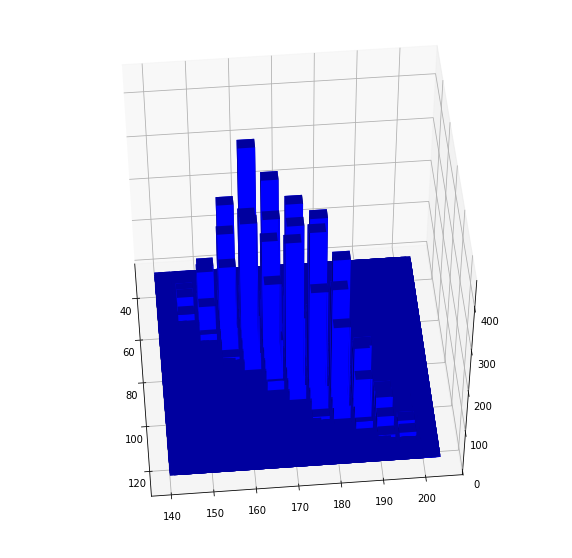

In [14]:
from helper import plot_joint_3d
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
conjunta_np = plot_joint_3d(frecuencia_conjunta, bins_width = 4, az=50, el=-5, ax=ax)

# Marginales y conjunta

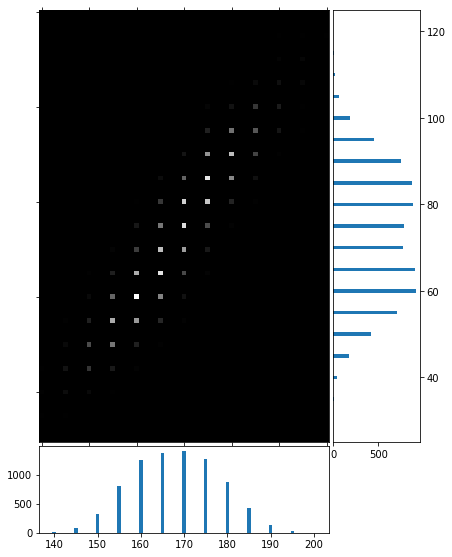

In [21]:
from helper import plot_joint_hists_dicts
conjunta_np, p_min, a_min = plot_joint_hists_dicts(frecuencia_conjunta)

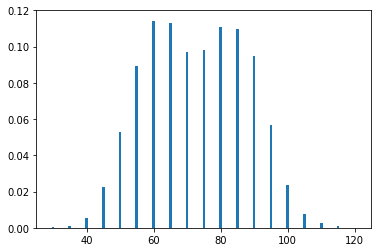

In [99]:
peso =  df['Peso']
peso_frecuencia = dict(Counter(peso))
peso_prob = {pe:c/len(peso) for pe, c in peso_frecuencia.items()}
plt.bar(peso_prob.keys(), peso_prob.values())
plt.show()

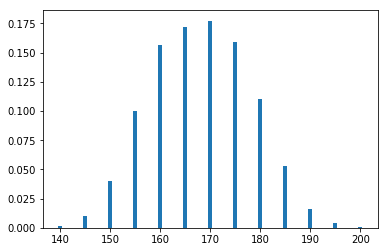

In [100]:
altura =  df['Altura']
altura_frecuencia = dict(Counter(altura))
altura_prob = {al:c/len(altura) for al, c in altura_frecuencia.items()}
plt.bar(altura_prob.keys(), altura_prob.values())
plt.show()

In [101]:
peso_gen = np.random.choice(list(peso_prob.keys()), size = 10000, p = list(peso_prob.values()))
print(peso_gen[:100])

[ 70  50  90  80  75  50  70  55  65  70  85  85  85  65  90  65  85  90
 100  90  75  75  50 100  75  95  95  80 105  35  70  65  70  70  70 110
  85  70  75  50  75  60  95  90  85  75  55  60  60  50  60  65  80  55
  65  70  75  60  75  55  85  80  60 105  85  65  85  70  65  65  55  65
  60  75  60  85  45  45  50  75  85  75  65  60  85  75  50 100  55  50
  75  55  60  75  50  80  75  65  65  60]


In [102]:
alt_gen = np.random.choice(list(altura_prob.keys()), size = 10000, p = list(altura_prob.values()))
print(alt_gen[:100])

[185 165 185 160 175 180 170 180 155 155 160 180 180 175 165 170 185 165
 185 180 165 165 150 175 170 185 175 160 170 180 180 160 165 165 175 160
 170 155 155 165 165 165 160 175 165 180 180 160 165 170 175 170 160 165
 160 180 185 190 170 180 165 155 170 150 175 175 175 170 180 160 175 180
 165 180 175 175 165 175 175 165 175 155 175 150 155 170 165 155 160 165
 150 155 180 170 150 175 150 170 180 180]


In [103]:
gen_from_marg = [(peso_gen[i], alt_gen[i]) for i in range(len(alt_gen))]

In [104]:
frec_gen_from_marg = dict(Counter(gen_from_marg))

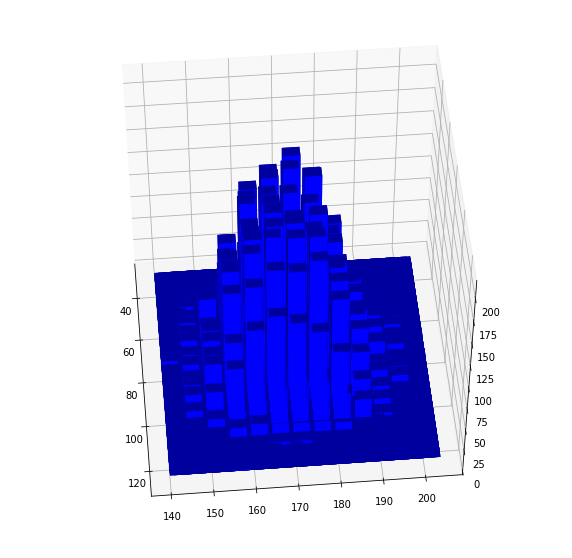

In [82]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
conjunta_np = plot_joint_3d(frec_gen_from_marg, bins_width = 4, az=50, el=-5, ax=ax)

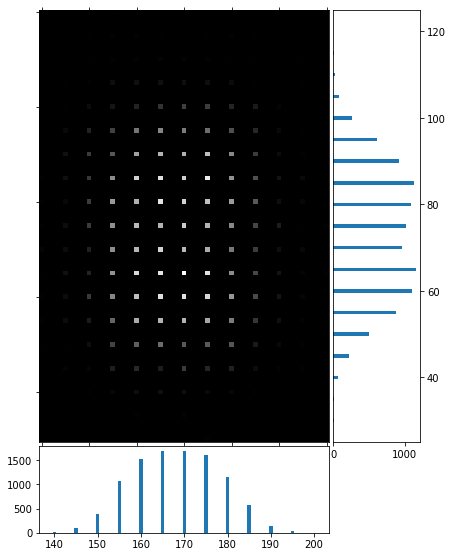

In [83]:
conjunta_np, p_min, a_min = plot_joint_hists_dicts(frec_gen_from_marg)

# Como podríamos generar?

In [105]:
items = list(conjunta_prob.items())
print(items)

[((60, 160), 0.056625), ((95, 180), 0.025125), ((75, 170), 0.04925), ((55, 160), 0.034), ((55, 150), 0.007375), ((80, 175), 0.043875), ((70, 170), 0.034875), ((55, 155), 0.03775), ((85, 180), 0.029875), ((60, 165), 0.029375), ((80, 165), 0.01225), ((95, 185), 0.019125), ((75, 165), 0.026125), ((65, 170), 0.016), ((65, 160), 0.038125), ((40, 150), 0.002), ((40, 145), 0.00275), ((70, 160), 0.0135), ((65, 165), 0.05025), ((85, 170), 0.022), ((85, 165), 0.002875), ((50, 155), 0.026), ((90, 175), 0.03275), ((30, 145), 0.000125), ((45, 150), 0.011625), ((60, 155), 0.022375), ((90, 170), 0.0045), ((90, 180), 0.041875), ((110, 195), 0.001375), ((85, 185), 0.00375), ((65, 155), 0.006875), ((85, 175), 0.051), ((70, 165), 0.042125), ((60, 170), 0.003875), ((60, 150), 0.002), ((90, 190), 0.000625), ((100, 185), 0.012125), ((45, 155), 0.00575), ((50, 150), 0.016625), ((105, 185), 0.00225), ((80, 170), 0.046125), ((35, 145), 0.000375), ((95, 175), 0.00725), ((50, 160), 0.0075), ((75, 175), 0.01675),

In [106]:
import numpy as np

In [107]:
data_indexes = np.random.choice(88, size = 10000, p = [x[1] for x in items])

In [53]:
generates_data = []
for i in data_indexes:
    generates_data.append(items[i][0])

In [57]:
gen_frec = dict(Counter(generates_data))

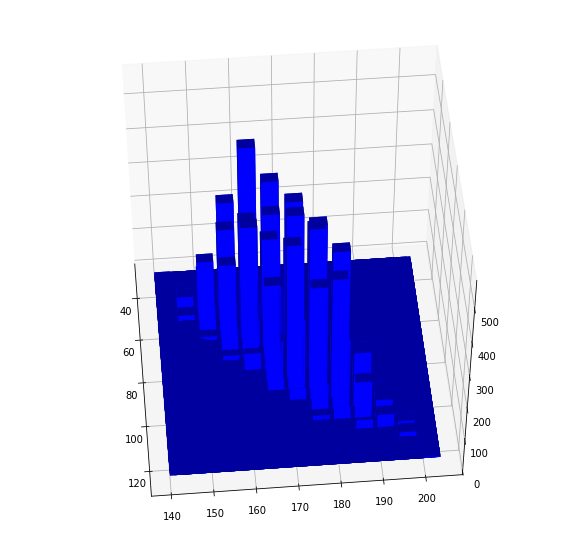

In [61]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
conjunta_np = plot_joint_3d(gen_frec, bins_width = 4, az=50, el=-5, ax=ax)

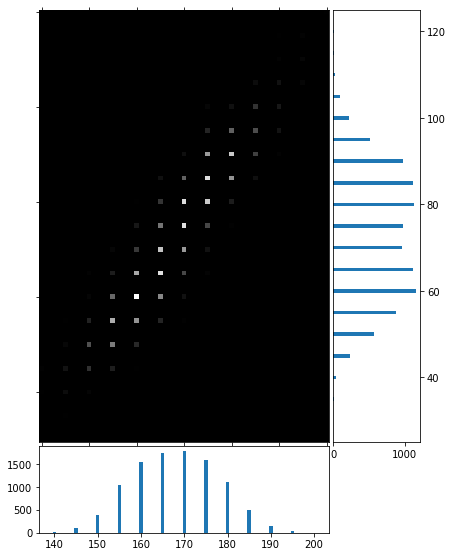

In [62]:
from helper import plot_joint_hists_dicts
conjunta_np, p_min, a_min = plot_joint_hists_dicts(gen_frec)